# INSTALL DEPENDENCIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [59]:
colorImgBgr = cv2.imread(r'../../Downloads/download.png')
grayImg = cv2.imread(r'../../Downloads/puppy.jpeg', cv2.IMREAD_GRAYSCALE)

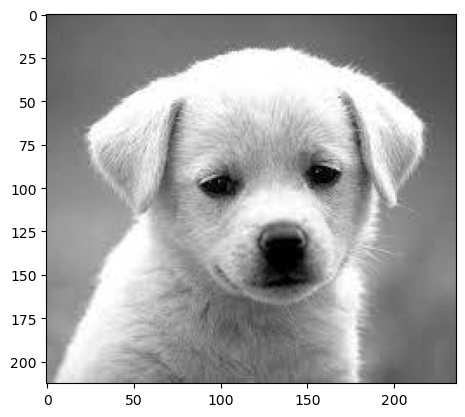

In [60]:
plt.imshow(grayImg, cmap='gray')

In [7]:
import matplotlib as mpl
def displayImageInActualSize(img):
    dpi = mpl.rcParams['figure.dpi']
    H, W = img.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    plt.show

def displayImageInActualSizeColor(img):
    dpi = mpl.rcParams['figure.dpi']
    H, W = img.shape[0:2]
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img)
    plt.show

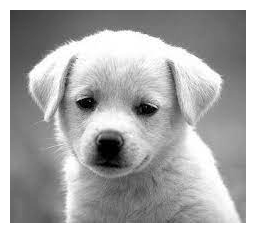

In [8]:
displayImageInActualSize(grayImgBGR_2)

# BILINEAR TRANSFORMATION

In [61]:
def f_bilinearInterpolate(row, col, I):
    leftCol = int(col)
    rightCol = leftCol + 1
    widthLeft = col - leftCol
    widthRight = rightCol - col
    topRow = int(row)
    bottomRow = topRow + 1
    widthTop = row - topRow
    widthBottom = bottomRow - row
    if topRow >= 0 and bottomRow < I.shape[0] and leftCol >= 0 and rightCol < I.shape[1]:
        a = I[topRow, leftCol] * widthRight + I[topRow, rightCol] * widthLeft
        b = I[bottomRow, leftCol] * widthRight + I[bottomRow, rightCol] * widthLeft
        g = widthTop * b + widthBottom * a
        return np.uint8(g)
    else:
        return 0

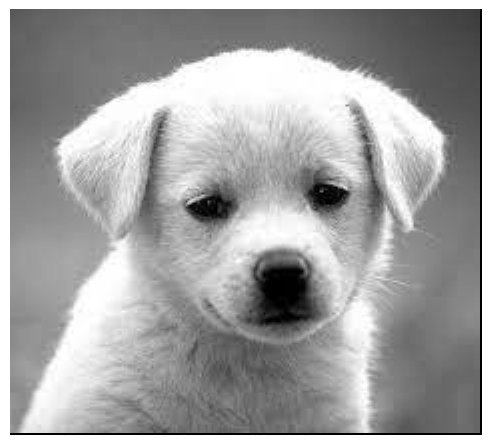

In [62]:
displayImageInActualSize(f_scaleImage([2,2], grayImgBGR))

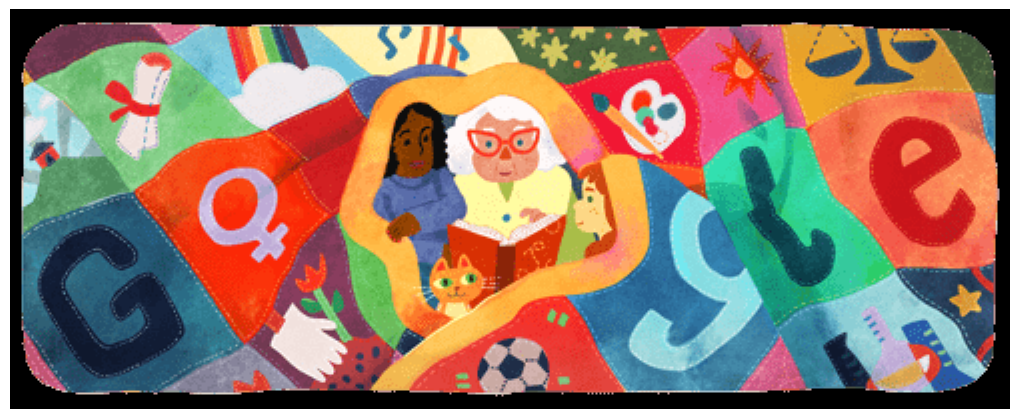

In [26]:
ImgClr = colorImg[:,:,::-1]
scale = [2,2]
r = f_scaleImage(scale, ImgClr[:,:,0])
g = f_scaleImage(scale, ImgClr[:,:,1])
b = f_scaleImage(scale, ImgClr[:,:,2])
C = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
C[:,:,0] = r
C[:,:,1] = g
C[:,:,2] = b
displayImageInActualSizeColor(C)


# ROTATION IMPLEMANTATION

In [46]:
a = 45 # degrees
cosA = np.cos(np.deg2rad(a))
sinA = np.sin(np.deg2rad(a))
R = np.array([[cosA, -sinA], [sinA, cosA]])
rMax, cMax = grayImgBGR.shape[0], grayImgBGR.shape[1]
coords = np.array([[0,0], [0, cMax - 1], [rMax - 1, 0], [rMax - 1, cMax -1]])
A_dash = R.dot(coords.T)
mins = A_dash.min(axis=1)
maxs = A_dash.max(axis=1)

In [47]:
mins

array([-166.17009358,    0.        ])

In [48]:
maxs

array([149.90663761, 316.07673119])

In [49]:
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))

In [50]:
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))

In [51]:
H, W = maxR - minR + 1, maxC - minC + 1

In [52]:
newImage = np.zeros((H, W), dtype='uint8')

In [53]:
newImage.shape

(318, 318)

In [54]:
Tinv = np.linalg.inv(R)
numRows = grayImgBGR.shape[0]
numCols = grayImgBGR.shape[1]

In [55]:
for new_i in range(minR, maxR):
   for new_j in range(minC, maxC):
       P_dash = np.array([new_i, new_j])
       P = Tinv.dot(P_dash)
       i, j = P[0], P[1]
       if i<0 or i>=numRows or j<0 or j >= numCols:
           pass
       else:
           g = f_bilinearInterpolate_teacher(i, j, grayImgBGR)
           newImage[new_i - minR, new_j - minC] = g

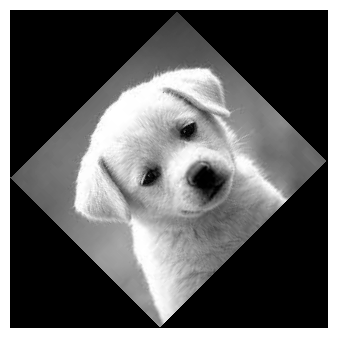

In [56]:
displayImageInActualSize(newImage)

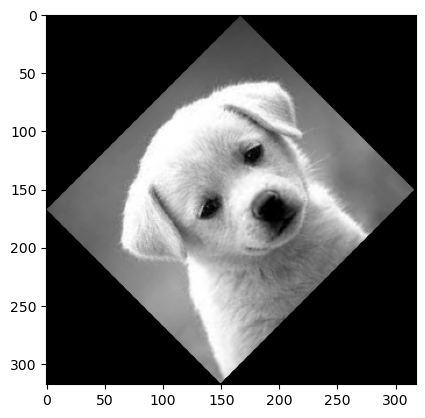

In [57]:
plt.imshow(newImage, cmap='gray')